<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/BenjGaskU3Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why I Chose This Project**

Jayson Tatum is my favorite NBA player. As a Celtics and Duke basketball fan, he has been my favorite player for almost 10 years now. He is also - sadly - the most hated player in the NBA, with many fans calling him corny, selfish, etc. The corny part is just a sad opinion, but the selfish part can be proven wrong through looking at his assist numbers from this past season. He adapted in a way not many players can, taking less shots and passing more, in order to lead the Celtics to a championship.

**So what is an assist?**

An assist in basketball is a relatively simple statistic. Everytime a person scores, the player who passed them the ball leading to that bucket, gets one assist. Another factor is unasuisted baskets. Just because a player passed the ball to someone who scored completely on their own 10 seconds late, does not mean they get an assist. An assist has to be leading to a point because of the pass; not because of the player the pass went to. Oftentimes players with low assist numbers are selfish and players with high assist numbers are pass-first players, or point guards. The two extremes are probably Michael Porter Jr. and Chris Paul, respectively.

In [2]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.

In [3]:
url_JTassist = 'https://raw.githubusercontent.com/benji555-create/Data-Science/refs/heads/main/JayTatum%20Assists%20-%20Sheet1%20(1).csv'
data_JTassist = pd.read_csv(url_JTassist)
data_JTassist

,4
0,5
1,3
2,4
3,1
4,2
...,...
68,4
69,3
70,5
71,6


That is Jayson Tatum's assist numbers from this past regular season. PSA: The NBA season is 82 games long, but Tatum only played in 73 games this year.

(array([ 2.,  8., 10., 11., 14., 11.,  8.,  6.,  2.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

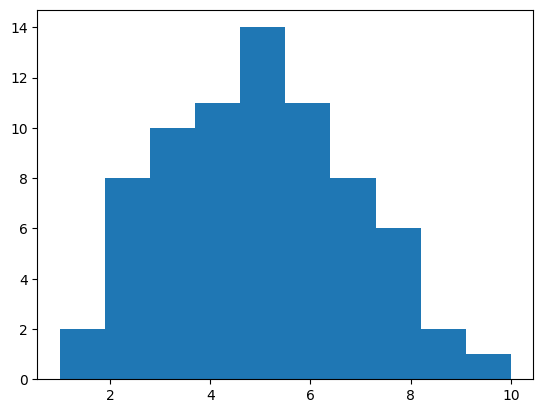

In [4]:
plt.hist(data_JTassist)

Based of of this, I'm going to use normal distribution for my prior. There doesn't seem to be any outliers so this model should work. There is very little to no skew.

<Axes: >

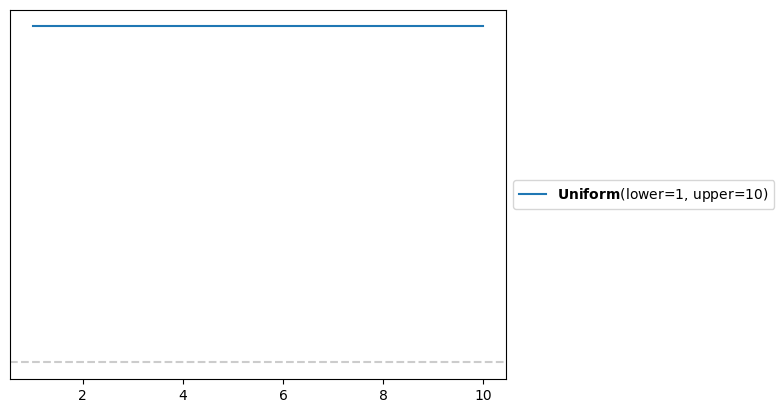

In [5]:
pz.Uniform(1,10).plot_pdf()

In [6]:
with pm.Model() as model_JTassistN:

    μ = pm.Uniform('μ', lower=1, upper=10)

    σ = pm.HalfNormal('σ', sigma=5)

    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_JTassist)
    idata_JTassistN = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

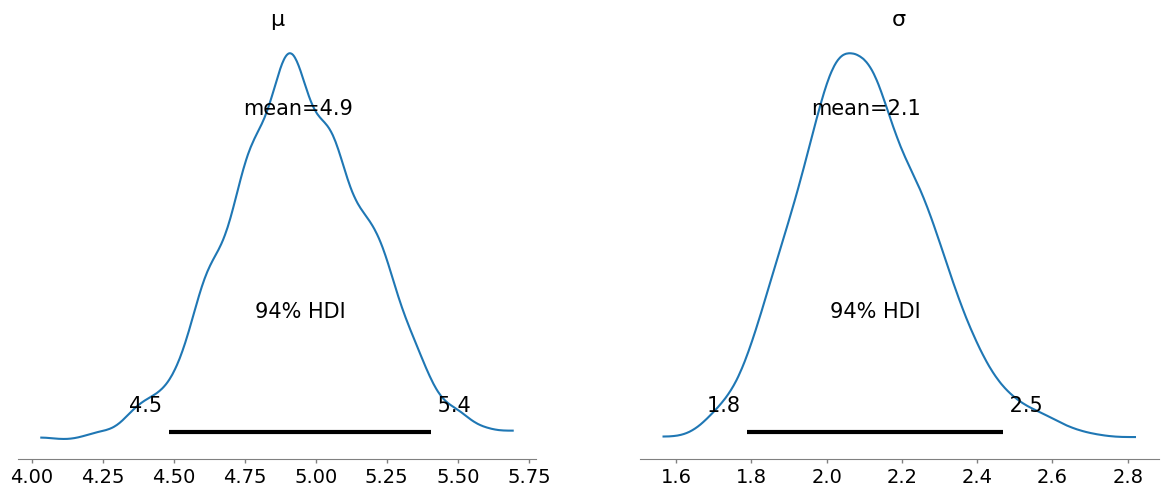

In [7]:
az.plot_posterior(idata_JTassistN)

In [8]:
pm.sample_posterior_predictive(idata_JTassistN, model=model_JTassistN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

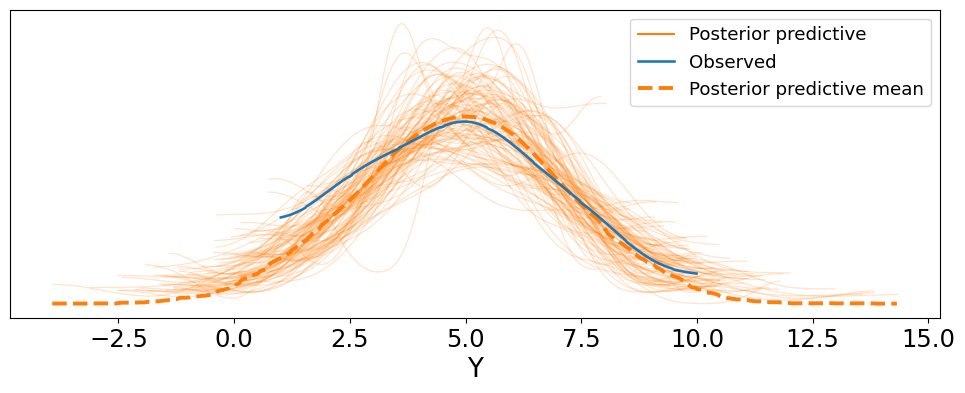

In [9]:
az.plot_ppc(idata_JTassistN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This model is soooooooo close. But it's not perfect. I think it could be the best available model, but I will try to find a better one.

In [11]:
with pm.Model() as model_JTassistT:

    μ = pm.Uniform('μ', lower=1, upper=10)

    σ = pm.HalfNormal('σ', sigma=5)

    Y = pm.StudentT('Y', nu = 1, mu = μ, sigma = σ, observed=data_JTassist)
    idata_JTassistT = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

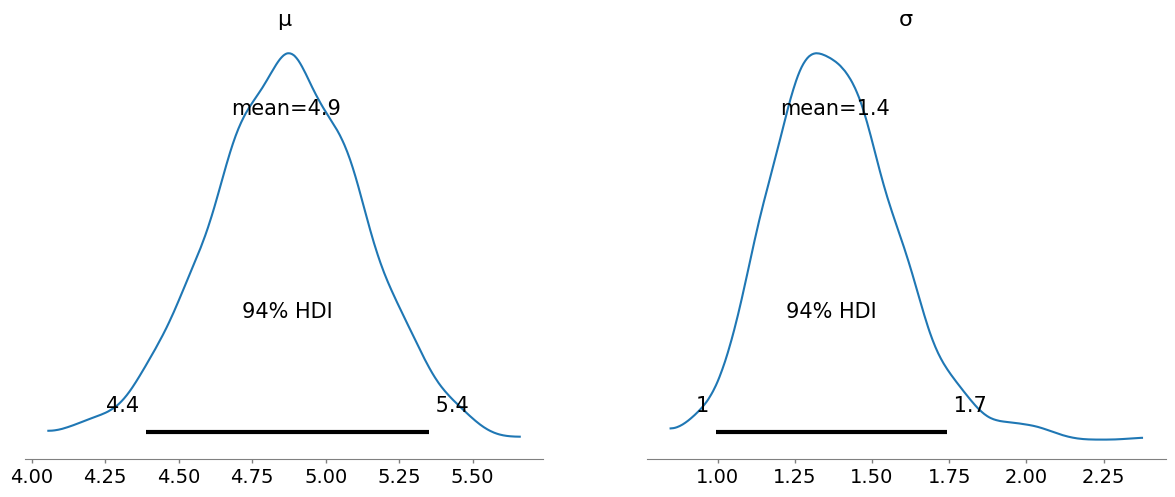

In [12]:
az.plot_posterior(idata_JTassistT)

(0.0, 10.0)

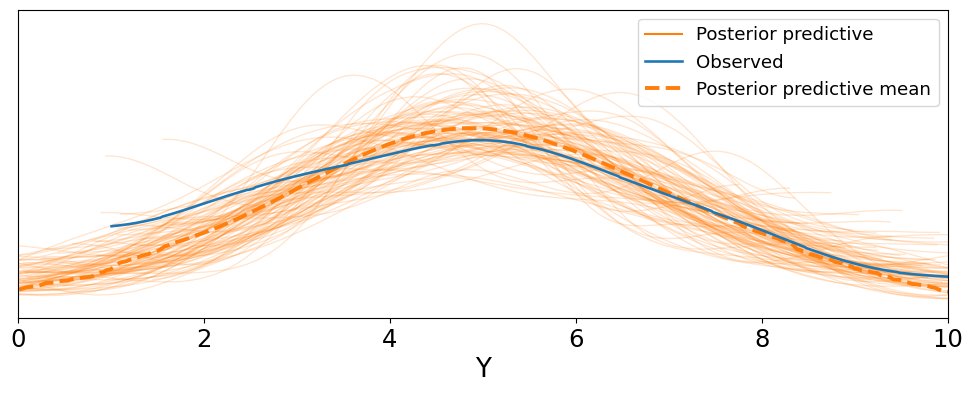

In [13]:
ax = az.plot_ppc(idata_JTassistN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0, 10)

I found a better one! This student T model pretty clearly fits the mean the best. It's almost exact on the line, and it shows almsot a perfect representation of JT's assists.

**Conclusion**

Jayson Tatum is NOT a selfish player. His assists, as shown by the model, hover around the 4-6 mark, and tht is a relatively average assist total. The media just needs to have propaganda around the future MVP and GOAT, Jayson Tatum.